<a href="https://colab.research.google.com/github/vitoriaferreirap/DeepLearning/blob/main/CNN_Computer_Vision/2_Lebeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Verificar as anotacoes para ver se os rotulos estao corretos antes do treino.
# Visualizar cada imagem com as bounding boxes desenhadas.
# Conferir se todas tem bounding boxes, com sua classe.

In [2]:
# descompactar pasta
!unzip /dataset.zip -d /content/


Archive:  /dataset.zip
   creating: /content/dataset/
   creating: /content/dataset/annotation/
  inflating: /content/dataset/annotation/labels_my-project-name_2026-02-19-11-38-41.json  
   creating: /content/dataset/imagens/
  inflating: /content/dataset/imagens/1.jpg  
  inflating: /content/dataset/imagens/2.jpg  
  inflating: /content/dataset/imagens/3.jpg  
  inflating: /content/dataset/imagens/4.jpg  
  inflating: /content/dataset/imagens/5.jpg  
  inflating: /content/dataset/imagens/6.jpg  
  inflating: /content/dataset/imagens/7.jpg  


In [3]:
# pacote pycocotools (COCO API)
# biblioteca permite ler arquivos COCO JSON e trabalhar com as anotações facilmente.
!pip install pycocotools

import json
import matplotlib.pyplot as plt # desenha as imagens e boxes
import matplotlib.patches as patches # cria retângulos (bounding boxes)
from PIL import Image # abri imagens
import os # manipula caminhos de pastas

In [12]:
# Caminho da pasta do dataset
dataset_path = "/content/dataset"
images_path = os.path.join(dataset_path, "imagens")
annotations_path = os.path.join(dataset_path, "annotation" ,  "labels_my-project-name_2026-02-19-11-38-41.json")

In [13]:
# Carrega o JSON COCO
with open(annotations_path) as f:
   # coco_data agora contém todas as imagens, anotações e categorias
    coco_data = json.load(f)

In [15]:
# Dicionário que associa o 'id' da imagem ao arquivo
images_dict = {img['id']: img for img in coco_data['images']}

# Dicionário que associa o 'id' da categoria ao nome da classe
categories_dict = {cat['id']: cat['name'] for cat in coco_data['categories']}


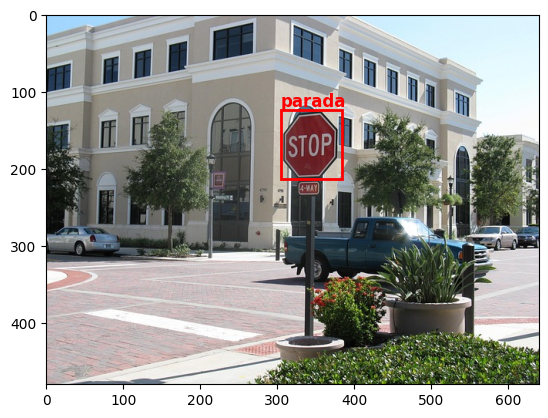

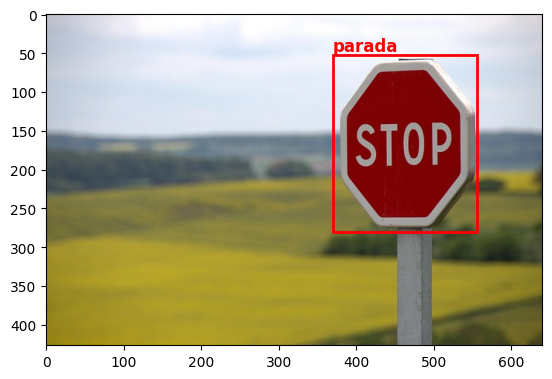

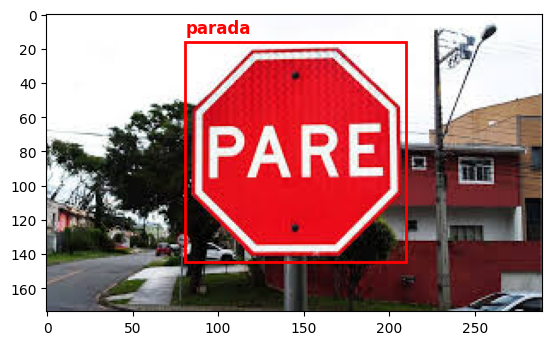

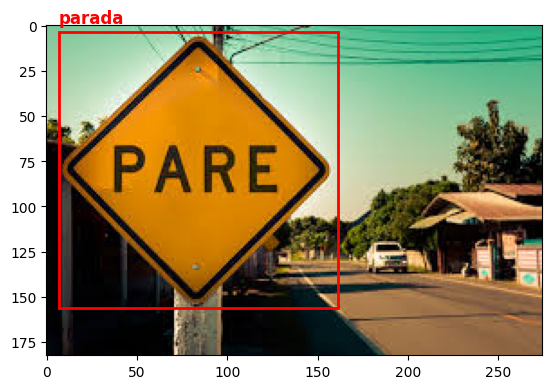

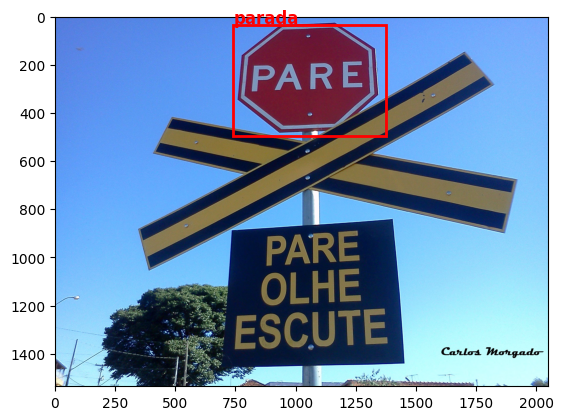

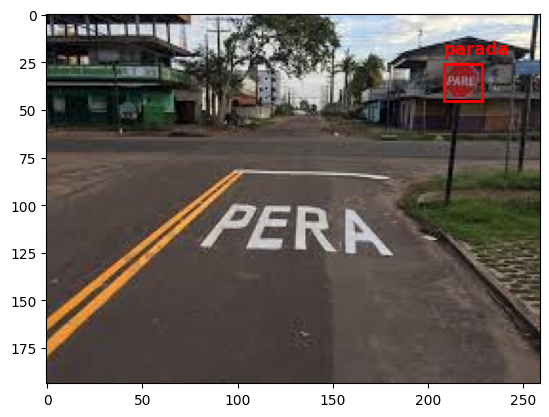

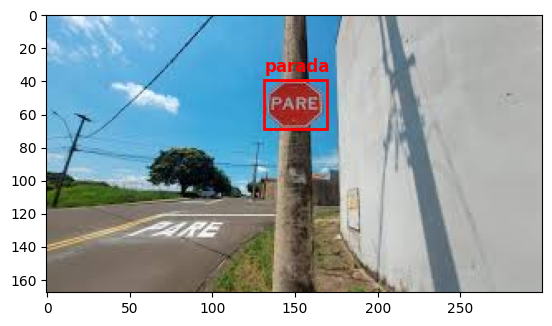

In [16]:
# loop para vizualizar anotacoes
# Cada anotação corresponde a uma bounding box de um objeto em uma imagem
for ann in coco_data['annotations']:
    # Recupera informações da imagem correspondente à anotação
    image_info = images_dict[ann['image_id']]
    image_path = os.path.join(images_path, image_info['file_name'])

    # Abre a imagem
    img = Image.open(image_path)

    # Cria o gráfico para desenhar a imagem
    fig, ax = plt.subplots(1)
    ax.imshow(img)

    # Pega as coordenadas da bounding box
    # COCO: [x, y, width, height]
    x, y, w, h = ann['bbox']

    # Cria um retângulo
    rect = patches.Rectangle(
        (x, y), w, h, linewidth=2, edgecolor='r', facecolor='none'
    )
    # Adiciona o retângulo na imagem
    ax.add_patch(rect)

    # Escreve o nome da classe no canto superior da box
    category_name = categories_dict[ann['category_id']]
    ax.text(x, y-5, category_name, color='red', fontsize=12, weight='bold')

    # Mostra a imagem com a box
    plt.show()

  # Para teste, mostra só uma imagem
# break

In [ ]:
# Detecçao
# Lida com uma ou várias classes dentro de uma só imagem.

In [ ]:
# Classificacao
# Lida com apenas uma classe por imagem.

In [ ]:
# Segmentacao semantica